In [298]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [299]:
data_path = '/content/drive/MyDrive/temp-data.csv'

In [300]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime

In [301]:
data = pd.read_csv(data_path)

In [302]:
data.head()

,id,room_id/id,noted_date,temp,out/in
0,__export__.temp_log_196134_bd201015,Room Admin,08-12-2018 09:30,29,In
1,__export__.temp_log_196131_7bca51bc,Room Admin,08-12-2018 09:30,29,In
2,__export__.temp_log_196127_522915e3,Room Admin,08-12-2018 09:29,41,Out
3,__export__.temp_log_196128_be0919cf,Room Admin,08-12-2018 09:29,41,Out
4,__export__.temp_log_196126_d30b72fb,Room Admin,08-12-2018 09:29,31,In


In [303]:
# data['room_id/id'].unique()
# data['room_id/id'].isnull().sum()
data.drop('room_id/id',axis=1,inplace=True) # since we are not getting any information from this column

In [304]:
data.head()

,id,noted_date,temp,out/in
0,__export__.temp_log_196134_bd201015,08-12-2018 09:30,29,In
1,__export__.temp_log_196131_7bca51bc,08-12-2018 09:30,29,In
2,__export__.temp_log_196127_522915e3,08-12-2018 09:29,41,Out
3,__export__.temp_log_196128_be0919cf,08-12-2018 09:29,41,Out
4,__export__.temp_log_196126_d30b72fb,08-12-2018 09:29,31,In


In [305]:
new_data['noted_date'].dt.year.unique()  # this shows that we have data available to use for only 1 year ie 2018

array([2018])

In [306]:
keys = ['out','in']
values = [data['out/in'].value_counts()[0],data['out/in'].value_counts()[1]]
data['out/in'].value_counts()

Out    77261
In     20345
Name: out/in, dtype: int64

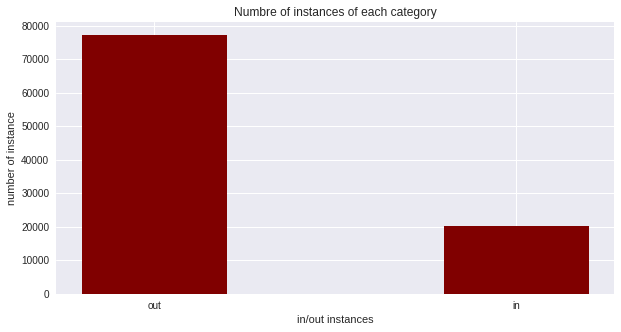

In [307]:
plt.style.use('seaborn')

fig = plt.figure(figsize=(10,5))
plt.bar(keys,values,color='maroon',width=0.4)

plt.xlabel('in/out instances')
plt.ylabel('number of instance')
plt.title('Numbre of instances of each category')
plt.show()

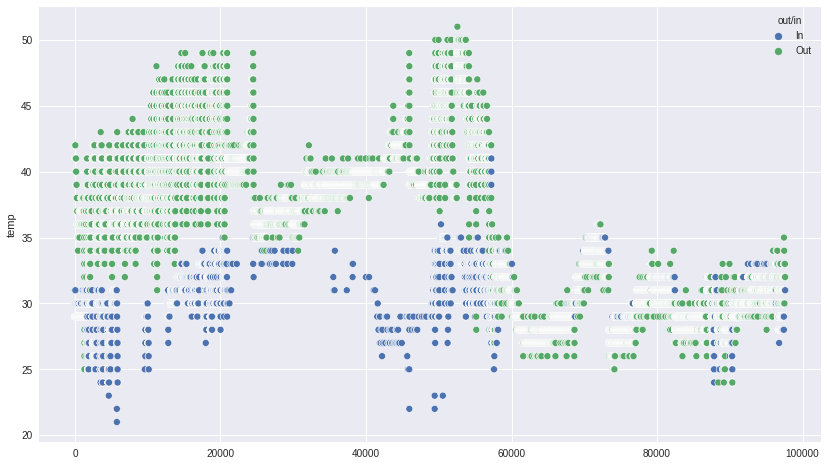

In [308]:
# plotting temperature with respect to in/out categories

fig_dims = (14,8)
fig,ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(x = data.index,y=data['temp'],ax=ax,hue=data['out/in'])

#### Making seprate date and time columns

In [309]:
data['Dates'] = pd.to_datetime(data['noted_date']).dt.date
data['Time'] = pd.to_datetime(data['noted_date']).dt.time

In [310]:
data.head()

,id,noted_date,temp,out/in,Dates,Time
0,__export__.temp_log_196134_bd201015,08-12-2018 09:30,29,In,2018-08-12,09:30:00
1,__export__.temp_log_196131_7bca51bc,08-12-2018 09:30,29,In,2018-08-12,09:30:00
2,__export__.temp_log_196127_522915e3,08-12-2018 09:29,41,Out,2018-08-12,09:29:00
3,__export__.temp_log_196128_be0919cf,08-12-2018 09:29,41,Out,2018-08-12,09:29:00
4,__export__.temp_log_196126_d30b72fb,08-12-2018 09:29,31,In,2018-08-12,09:29:00


#### Making a new columns for seasons based on the Dates column

In [311]:
data['Dates'] = data['Dates'].astype(str)

In [312]:
seasons = []
for date in data['Dates']:
  my_date = datetime.strptime(date,"%Y-%m-%d")
  if my_date.month == 12 or my_date.month == 1:
    seasons.append("winter")
  elif my_date.month == 3 or my_date.month == 4 or my_date.month == 5:
    seasons.append("summer")
  elif my_date.month == 6 or my_date.month == 7 or my_date.month == 8 or my_date.month == 9:
    seasons.append("monsoon")
  else:
    seasons.append("autumn")


In [313]:
new_data = data.assign(Seasons = seasons)

In [314]:
new_data['Seasons'].value_counts()

autumn     62170
monsoon    18813
summer      9137
winter      7486
Name: Seasons, dtype: int64

In [315]:
print(f"Highest monsoon temperature : %d" %(new_data.temp[new_data['Seasons']=='monsoon'].max()))
print(f"Lowest monsoon temperature : %d" %(new_data.temp[new_data['Seasons']=='monsoon'].min()))
print(f"Average monsoon temperature : %d" %(new_data.temp[new_data['Seasons']=='monsoon'].mean()))

print(f"Highest autumn temperature : %d" %(new_data.temp[new_data['Seasons']=='autumn'].max()))
print(f"Lowest autumn temperature : %d" %(new_data.temp[new_data['Seasons']=='autumn'].min()))
print(f"Average autumn temperature : %d" %(new_data.temp[new_data['Seasons']=='autumn'].mean()))

print(f"Highest summer temperature : %d" %(new_data.temp[new_data['Seasons']=='summer'].max()))
print(f"Lowest summer temperature : %d" %(new_data.temp[new_data['Seasons']=='summer'].min()))
print(f"Average summer temperature : %d" %(new_data.temp[new_data['Seasons']=='summer'].mean()))

print(f"Highest winter temperature : %d" %(new_data.temp[new_data['Seasons']=='winter'].max()))
print(f"Lowest winter temperature : %d" %(new_data.temp[new_data['Seasons']=='winter'].min()))
print(f"Average winter temperature : %d" %(new_data.temp[new_data['Seasons']=='winter'].mean()))

Highest monsoon temperature : 51
Lowest monsoon temperature : 24
Average monsoon temperature : 33
Highest autumn temperature : 50
Lowest autumn temperature : 22
Average autumn temperature : 36
Highest summer temperature : 49
Lowest summer temperature : 21
Average summer temperature : 33
Highest winter temperature : 49
Lowest winter temperature : 26
Average winter temperature : 31


In [316]:
print(f"Highest In temperature : %d" %(new_data.temp[new_data['out/in']=='In'].max()))
print(f"Lowest In temperature : %d" %(new_data.temp[new_data['out/in']=='In'].min()))
print(f"Average In temperature : %d" %(new_data.temp[new_data['out/in']=='In'].mean()))
print(f"Highest Out temperature : %d" %(new_data.temp[new_data['out/in']=='Out'].max()))
print(f"Lowest Out temperature : %d" %(new_data.temp[new_data['out/in']=='Out'].min()))
print(f"Average Out temperature : %d" %(new_data.temp[new_data['out/in']=='Out'].mean()))

Highest In temperature : 41
Lowest In temperature : 21
Average In temperature : 30
Highest Out temperature : 51
Lowest Out temperature : 24
Average Out temperature : 36


In [317]:
new_data.head()

,id,noted_date,temp,out/in,Dates,Time,Seasons
0,__export__.temp_log_196134_bd201015,08-12-2018 09:30,29,In,2018-08-12,09:30:00,monsoon
1,__export__.temp_log_196131_7bca51bc,08-12-2018 09:30,29,In,2018-08-12,09:30:00,monsoon
2,__export__.temp_log_196127_522915e3,08-12-2018 09:29,41,Out,2018-08-12,09:29:00,monsoon
3,__export__.temp_log_196128_be0919cf,08-12-2018 09:29,41,Out,2018-08-12,09:29:00,monsoon
4,__export__.temp_log_196126_d30b72fb,08-12-2018 09:29,31,In,2018-08-12,09:29:00,monsoon


In [318]:
new_data['noted_date'] = pd.to_datetime(new_data['noted_date'])

In [319]:
new_data['Period'] = (new_data['noted_date'].dt.hour % 24 + 4) // 4
new_data['Period'].replace({
    1:'Late Night',
    2:'Early Morning',
    3:'Morning',
    4:'Noon',
    5:'Evening',
    6:'Night'
}, inplace=True)
new_data

,id,noted_date,temp,out/in,Dates,Time,Seasons,Period
0,__export__.temp_log_196134_bd201015,2018-08-12 09:30:00,29,In,2018-08-12,09:30:00,monsoon,Morning
1,__export__.temp_log_196131_7bca51bc,2018-08-12 09:30:00,29,In,2018-08-12,09:30:00,monsoon,Morning
2,__export__.temp_log_196127_522915e3,2018-08-12 09:29:00,41,Out,2018-08-12,09:29:00,monsoon,Morning
3,__export__.temp_log_196128_be0919cf,2018-08-12 09:29:00,41,Out,2018-08-12,09:29:00,monsoon,Morning
4,__export__.temp_log_196126_d30b72fb,2018-08-12 09:29:00,31,In,2018-08-12,09:29:00,monsoon,Morning
...,...,...,...,...,...,...,...,...
97601,__export__.temp_log_91076_7fbd08ca,2018-07-28 07:07:00,31,In,2018-07-28,07:07:00,monsoon,Early Morning
97602,__export__.temp_log_147733_62c03f31,2018-07-28 07:07:00,31,In,2018-07-28,07:07:00,monsoon,Early Morning
97603,__export__.temp_log_100386_84093a68,2018-07-28 07:06:00,31,In,2018-07-28,07:06:00,monsoon,Early Morning
97604,__export__.temp_log_123297_4d8e690b,2018-07-28 07:06:00,31,In,2018-07-28,07:06:00,monsoon,Early Morning


In [320]:
new_data['Period'].value_counts()

Noon             21944
Evening          17866
Morning          15992
Night            14456
Late Night       13749
Early Morning    13599
Name: Period, dtype: int64

In [321]:
periods_of_day = new_data.Period.unique()
print(periods_of_day)

['Morning' 'Early Morning' 'Late Night' 'Night' 'Evening' 'Noon']


### Analyzing monsoon data

In [322]:
monsoon_data = new_data[new_data['Seasons']=='monsoon']
monsoon_data.head()

,id,noted_date,temp,out/in,Dates,Time,Seasons,Period
0,__export__.temp_log_196134_bd201015,2018-08-12 09:30:00,29,In,2018-08-12,09:30:00,monsoon,Morning
1,__export__.temp_log_196131_7bca51bc,2018-08-12 09:30:00,29,In,2018-08-12,09:30:00,monsoon,Morning
2,__export__.temp_log_196127_522915e3,2018-08-12 09:29:00,41,Out,2018-08-12,09:29:00,monsoon,Morning
3,__export__.temp_log_196128_be0919cf,2018-08-12 09:29:00,41,Out,2018-08-12,09:29:00,monsoon,Morning
4,__export__.temp_log_196126_d30b72fb,2018-08-12 09:29:00,31,In,2018-08-12,09:29:00,monsoon,Morning


In [323]:
monsoon_data['Period'].value_counts()

Noon             5263
Evening          3939
Morning          3541
Early Morning    2983
Late Night       1589
Night            1498
Name: Period, dtype: int64

Text(0.5, 1.0, 'Checking Outliers in Different Periods of the Day in Monsoon Season')

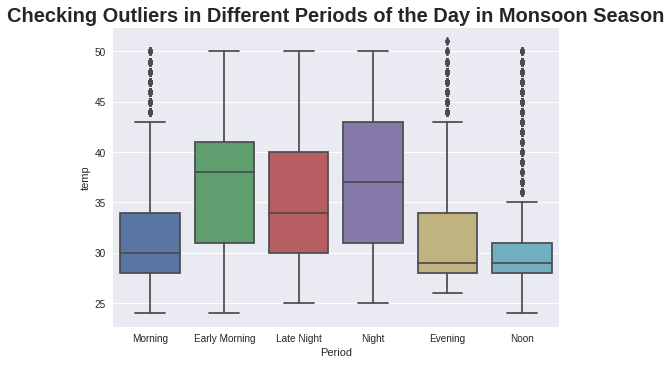

In [324]:
# Checking for the Outliers in different Periods of the day in Monsoon season

sns.boxplot(x=monsoon_data.Period,y = monsoon_data.temp).set_title('Checking Outliers in Different Periods of the Day in Monsoon Season',fontweight='bold',fontsize=20)

In [325]:
min_early_morning = monsoon_data.temp[monsoon_data['Period'] == 'Early Morning'].min()
avg_early_morning = monsoon_data.temp[monsoon_data['Period'] == 'Early Morning'].mean()
max_early_morning = monsoon_data.temp[monsoon_data['Period'] == 'Early Morning'].max()

min_morning = monsoon_data.temp[monsoon_data['Period'] == 'Morning'].min()
avg_morning = monsoon_data.temp[monsoon_data['Period'] == 'Morning'].mean()
max_morning = monsoon_data.temp[monsoon_data['Period'] == 'Morning'].max()

min_noon = monsoon_data.temp[monsoon_data['Period'] == 'Noon'].min()
avg_noon = monsoon_data.temp[monsoon_data['Period'] == 'Noon'].mean()
max_noon = monsoon_data.temp[monsoon_data['Period'] == 'Noon'].max()

min_evening = monsoon_data.temp[monsoon_data['Period'] == 'Evening'].min()
avg_evening = monsoon_data.temp[monsoon_data['Period'] == 'Evening'].mean()
max_evening = monsoon_data.temp[monsoon_data['Period'] == 'Evening'].max()

min_night = monsoon_data.temp[monsoon_data['Period'] == 'Night'].min()
avg_night = monsoon_data.temp[monsoon_data['Period'] == 'Night'].mean()
max_night = monsoon_data.temp[monsoon_data['Period'] == 'Night'].max()

min_late_night = monsoon_data.temp[monsoon_data['Period'] == 'Late Night'].min()
avg_late_night = monsoon_data.temp[monsoon_data['Period'] == 'Late Night'].mean()
max_late_night = monsoon_data.temp[monsoon_data['Period'] == 'Late Night'].max()

In [326]:
minimum = [min_early_morning,min_morning,min_noon,min_evening,min_night,min_late_night]
average = [avg_early_morning,avg_morning,avg_noon,avg_evening,avg_night,avg_late_night]
maximum = [max_early_morning,max_morning,max_noon,max_evening,max_night,max_late_night]

In [327]:
monsoon_data['temp'].isnull().sum()

0

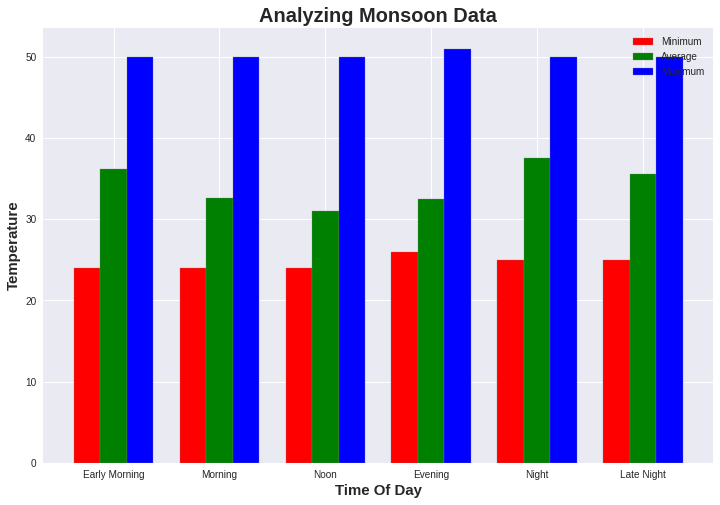

In [328]:
barwidth = 0.25
fig = plt.subplots(figsize=(12,8))


br1=np.arange(len(minimum))
br2=[x + barwidth for x in br1]
br3=[x + barwidth for x in br2]

plt.bar(br1, minimum , color='r', width=barwidth,edgecolor='grey',label='Minimum')
plt.bar(br2, average, color='g', width=barwidth,edgecolor='grey',label='Average')
plt.bar(br3, maximum, color='b', width=barwidth,edgecolor='grey',label='Maximum')

# Adding X ticks
plt.xlabel('Time Of Day', fontweight='bold', fontsize=15)
plt.ylabel('Temperature', fontweight='bold',fontsize=15)
plt.xticks([r+barwidth for r in range(len(minimum))],['Early Morning','Morning','Noon','Evening','Night','Late Night'])

plt.title('Analyzing Monsoon Data',fontweight='bold', fontsize=20)
plt.legend()
plt.show()


## Analyzing Autumn data

In [329]:
autumn_data = new_data[new_data['Seasons']=='autumn']
autumn_data.head()

,id,noted_date,temp,out/in,Dates,Time,Seasons,Period
6080,__export__.temp_log_176047_e1891dfb,2018-02-12 23:58:00,36,Out,2018-02-12,23:58:00,autumn,Night
6081,__export__.temp_log_176046_0b88a9a1,2018-02-12 23:58:00,36,Out,2018-02-12,23:58:00,autumn,Night
6082,__export__.temp_log_176045_f871af6e,2018-02-12 23:56:00,37,Out,2018-02-12,23:56:00,autumn,Night
6083,__export__.temp_log_176044_9ef3ba70,2018-02-12 23:56:00,37,Out,2018-02-12,23:56:00,autumn,Night
6084,__export__.temp_log_176041_c8086e46,2018-02-12 23:52:00,36,Out,2018-02-12,23:52:00,autumn,Night


Text(0.5, 1.0, 'Checking Outliers in Different Periods of the Day in Autumn Season')

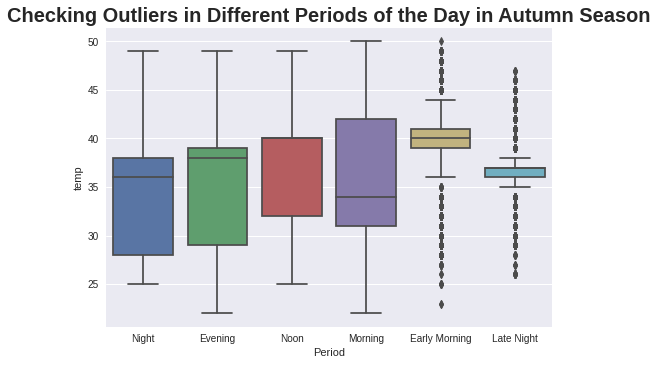

In [330]:
# Checking for the Outliers in different Periods of the day in Autumn Season

sns.boxplot(x=autumn_data.Period,y = autumn_data.temp).set_title('Checking Outliers in Different Periods of the Day in Autumn Season',fontweight='bold',fontsize=20)

In [331]:
min_early_morning = autumn_data.temp[autumn_data['Period'] == 'Early Morning'].min()
avg_early_morning = autumn_data.temp[autumn_data['Period'] == 'Early Morning'].mean()
max_early_morning = autumn_data.temp[autumn_data['Period'] == 'Early Morning'].max()

min_morning = autumn_data.temp[autumn_data['Period'] == 'Morning'].min()
avg_morning = autumn_data.temp[autumn_data['Period'] == 'Morning'].mean()
max_morning = autumn_data.temp[autumn_data['Period'] == 'Morning'].max()

min_noon = autumn_data.temp[autumn_data['Period'] == 'Noon'].min()
avg_noon = autumn_data.temp[autumn_data['Period'] == 'Noon'].mean()
max_noon = autumn_data.temp[autumn_data['Period'] == 'Noon'].max()

min_evening = autumn_data.temp[autumn_data['Period'] == 'Evening'].min()
avg_evening = autumn_data.temp[autumn_data['Period'] == 'Evening'].mean()
max_evening = autumn_data.temp[autumn_data['Period'] == 'Evening'].max()

min_night = autumn_data.temp[autumn_data['Period'] == 'Night'].min()
avg_night = autumn_data.temp[autumn_data['Period'] == 'Night'].mean()
max_night = autumn_data.temp[autumn_data['Period'] == 'Night'].max()

min_late_night = autumn_data.temp[autumn_data['Period'] == 'Late Night'].min()
avg_late_night = autumn_data.temp[autumn_data['Period'] == 'Late Night'].mean()
max_late_night = autumn_data.temp[autumn_data['Period'] == 'Late Night'].max()

In [332]:
minimum = [min_early_morning,min_morning,min_noon,min_evening,min_night,min_late_night]
average = [avg_early_morning,avg_morning,avg_noon,avg_evening,avg_night,avg_late_night]
maximum = [max_early_morning,max_morning,max_noon,max_evening,max_night,max_late_night]

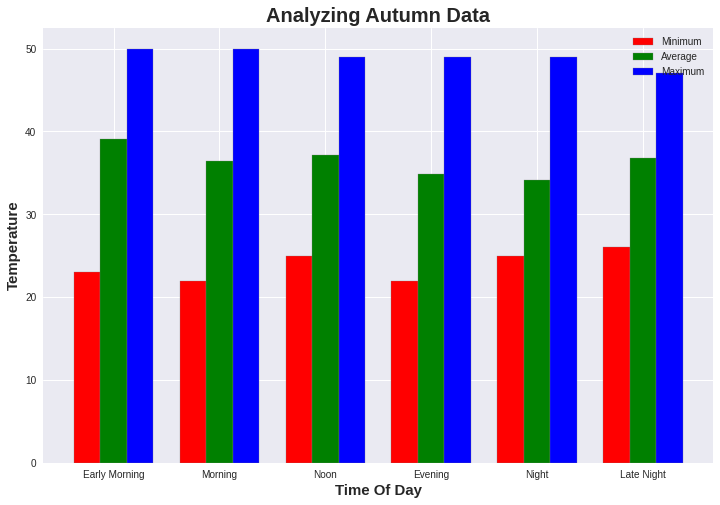

In [333]:
barwidth = 0.25
fig = plt.subplots(figsize=(12,8))


br1=np.arange(len(minimum))
br2=[x + barwidth for x in br1]
br3=[x + barwidth for x in br2]

plt.bar(br1, minimum , color='r', width=barwidth,edgecolor='grey',label='Minimum')
plt.bar(br2, average, color='g', width=barwidth,edgecolor='grey',label='Average')
plt.bar(br3, maximum, color='b', width=barwidth,edgecolor='grey',label='Maximum')

# Adding X ticks
plt.xlabel('Time Of Day', fontweight='bold', fontsize=15)
plt.ylabel('Temperature', fontweight='bold',fontsize=15)
plt.xticks([r+barwidth for r in range(len(minimum))],['Early Morning','Morning','Noon','Evening','Night','Late Night'])

plt.title('Analyzing Autumn Data',fontweight='bold', fontsize=20)
plt.legend()
plt.show()


## Analyzing Summer Data

In [334]:
summer_data = new_data[new_data['Seasons']=='summer']
summer_data.head()

,id,noted_date,temp,out/in,Dates,Time,Seasons,Period
3098,__export__.temp_log_186761_72d1d8af,2018-05-12 23:57:00,35,Out,2018-05-12,23:57:00,summer,Night
3099,__export__.temp_log_186762_ecc97b98,2018-05-12 23:57:00,35,Out,2018-05-12,23:57:00,summer,Night
3100,__export__.temp_log_186752_d3b8971f,2018-05-12 23:55:00,34,Out,2018-05-12,23:55:00,summer,Night
3101,__export__.temp_log_186754_02dace2a,2018-05-12 23:55:00,34,Out,2018-05-12,23:55:00,summer,Night
3102,__export__.temp_log_186748_6430d395,2018-05-12 23:53:00,34,Out,2018-05-12,23:53:00,summer,Night


Text(0.5, 1.0, 'Checking Outliers in Different Periods of the Day in Summer Season')

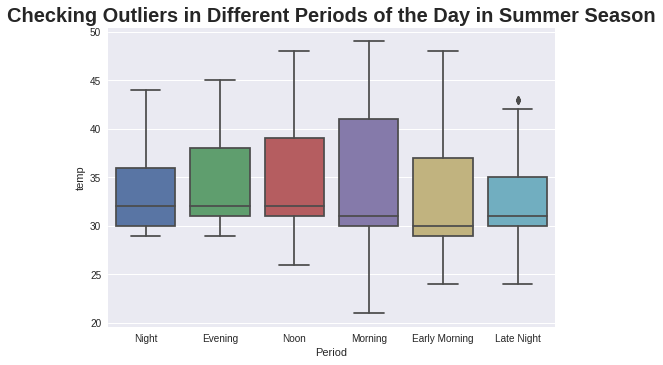

In [335]:
# Checking for the Outliers in different Periods of the day in Summer season

sns.boxplot(x=summer_data.Period,y = summer_data.temp).set_title('Checking Outliers in Different Periods of the Day in Summer Season',fontweight='bold',fontsize=20)

In [336]:
min_early_morning = summer_data.temp[summer_data['Period'] == 'Early Morning'].min()
avg_early_morning = summer_data.temp[summer_data['Period'] == 'Early Morning'].mean()
max_early_morning = summer_data.temp[summer_data['Period'] == 'Early Morning'].max()

min_morning = summer_data.temp[summer_data['Period'] == 'Morning'].min()
avg_morning = summer_data.temp[summer_data['Period'] == 'Morning'].mean()
max_morning = summer_data.temp[summer_data['Period'] == 'Morning'].max()

min_noon = summer_data.temp[summer_data['Period'] == 'Noon'].min()
avg_noon = summer_data.temp[summer_data['Period'] == 'Noon'].mean()
max_noon = summer_data.temp[summer_data['Period'] == 'Noon'].max()

min_evening = summer_data.temp[summer_data['Period'] == 'Evening'].min()
avg_evening = summer_data.temp[summer_data['Period'] == 'Evening'].mean()
max_evening = summer_data.temp[summer_data['Period'] == 'Evening'].max()

min_night = summer_data.temp[summer_data['Period'] == 'Night'].min()
avg_night = summer_data.temp[summer_data['Period'] == 'Night'].mean()
max_night = summer_data.temp[summer_data['Period'] == 'Night'].max()

min_late_night = summer_data.temp[summer_data['Period'] == 'Late Night'].min()
avg_late_night = summer_data.temp[summer_data['Period'] == 'Late Night'].mean()
max_late_night = summer_data.temp[summer_data['Period'] == 'Late Night'].max()

In [337]:
minimum = [min_early_morning,min_morning,min_noon,min_evening,min_night,min_late_night]
average = [avg_early_morning,avg_morning,avg_noon,avg_evening,avg_night,avg_late_night]
maximum = [max_early_morning,max_morning,max_noon,max_evening,max_night,max_late_night]

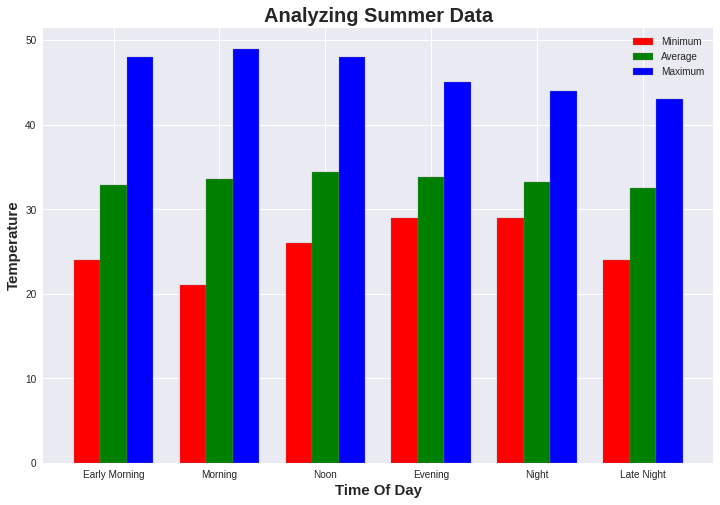

In [338]:
barwidth = 0.25
fig = plt.subplots(figsize=(12,8))


br1=np.arange(len(minimum))
br2=[x + barwidth for x in br1]
br3=[x + barwidth for x in br2]

plt.bar(br1, minimum , color='r', width=barwidth,edgecolor='grey',label='Minimum')
plt.bar(br2, average, color='g', width=barwidth,edgecolor='grey',label='Average')
plt.bar(br3, maximum, color='b', width=barwidth,edgecolor='grey',label='Maximum')

# Adding X ticks
plt.xlabel('Time Of Day', fontweight='bold', fontsize=15)
plt.ylabel('Temperature', fontweight='bold',fontsize=15)
plt.xticks([r+barwidth for r in range(len(minimum))],['Early Morning','Morning','Noon','Evening','Night','Late Night'])

plt.title('Analyzing Summer Data',fontweight='bold', fontsize=20)
plt.legend()
plt.show()


## Analyzing Winter Data

In [339]:
winter_data = new_data[new_data['Seasons']=='winter']
winter_data.head()

,id,noted_date,temp,out/in,Dates,Time,Seasons,Period
6890,__export__.temp_log_173383_51a6f011,2018-01-12 23:54:00,36,Out,2018-01-12,23:54:00,winter,Night
6891,__export__.temp_log_173382_08296c79,2018-01-12 23:54:00,36,Out,2018-01-12,23:54:00,winter,Night
6892,__export__.temp_log_173381_8ab39395,2018-01-12 23:52:00,35,Out,2018-01-12,23:52:00,winter,Night
6893,__export__.temp_log_173380_69d0af91,2018-01-12 23:52:00,35,Out,2018-01-12,23:52:00,winter,Night
6894,__export__.temp_log_173376_0736d012,2018-01-12 23:50:00,36,Out,2018-01-12,23:50:00,winter,Night


Text(0.5, 1.0, 'Checking Outliers in Different Periods of the Day in Winter Season')

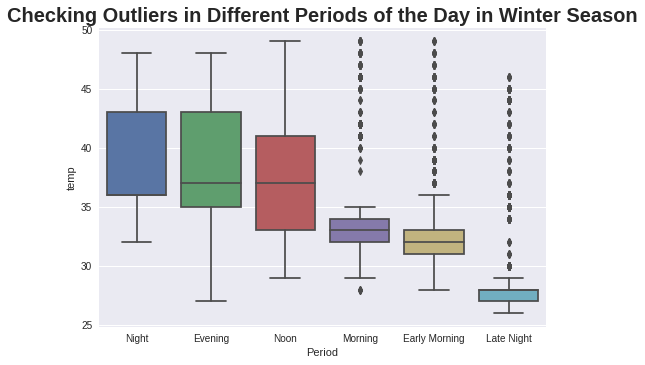

In [340]:
# Checking for the Outliers in different Periods of the day in Winter season

sns.boxplot(x=winter_data.Period,y = winter_data.temp).set_title('Checking Outliers in Different Periods of the Day in Winter Season',fontweight='bold',fontsize=20)

In [341]:
min_early_morning = winter_data.temp[winter_data['Period'] == 'Early Morning'].min()
avg_early_morning = winter_data.temp[winter_data['Period'] == 'Early Morning'].mean()
max_early_morning = winter_data.temp[winter_data['Period'] == 'Early Morning'].max()

min_morning = winter_data.temp[winter_data['Period'] == 'Morning'].min()
avg_morning = winter_data.temp[winter_data['Period'] == 'Morning'].mean()
max_morning = winter_data.temp[winter_data['Period'] == 'Morning'].max()

min_noon = winter_data.temp[winter_data['Period'] == 'Noon'].min()
avg_noon = winter_data.temp[winter_data['Period'] == 'Noon'].mean()
max_noon = winter_data.temp[winter_data['Period'] == 'Noon'].max()

min_evening = winter_data.temp[winter_data['Period'] == 'Evening'].min()
avg_evening = winter_data.temp[winter_data['Period'] == 'Evening'].mean()
max_evening = winter_data.temp[winter_data['Period'] == 'Evening'].max()

min_night = winter_data.temp[winter_data['Period'] == 'Night'].min()
avg_night = winter_data.temp[winter_data['Period'] == 'Night'].mean()
max_night = winter_data.temp[winter_data['Period'] == 'Night'].max()

min_late_night = summer_data.temp[summer_data['Period'] == 'Late Night'].min()
avg_late_night = summer_data.temp[summer_data['Period'] == 'Late Night'].mean()
max_late_night = summer_data.temp[summer_data['Period'] == 'Late Night'].max()

In [342]:
minimum = [min_early_morning,min_morning,min_noon,min_evening,min_night,min_late_night]
average = [avg_early_morning,avg_morning,avg_noon,avg_evening,avg_night,avg_late_night]
maximum = [max_early_morning,max_morning,max_noon,max_evening,max_night,max_late_night]

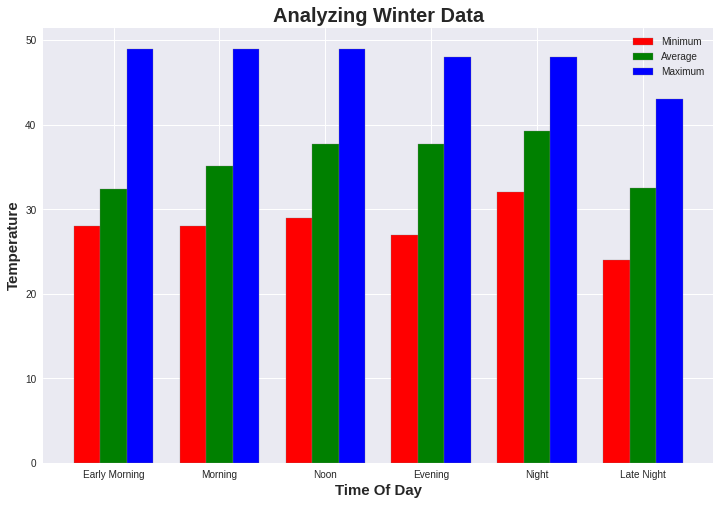

In [343]:
barwidth = 0.25
fig = plt.subplots(figsize=(12,8))


br1=np.arange(len(minimum))
br2=[x + barwidth for x in br1]
br3=[x + barwidth for x in br2]

plt.bar(br1, minimum , color='r', width=barwidth,edgecolor='grey',label='Minimum')
plt.bar(br2, average, color='g', width=barwidth,edgecolor='grey',label='Average')
plt.bar(br3, maximum, color='b', width=barwidth,edgecolor='grey',label='Maximum')

# Adding X ticks
plt.xlabel('Time Of Day', fontweight='bold', fontsize=15)
plt.ylabel('Temperature', fontweight='bold',fontsize=15)
plt.xticks([r+barwidth for r in range(len(minimum))],['Early Morning','Morning','Noon','Evening','Night','Late Night'])

plt.title('Analyzing Winter Data',fontweight='bold', fontsize=20)
plt.legend()
plt.show()
